In [29]:
import os
import mlflow
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_data_utils import build_data_pipeline, AUGMENTER

In [ ]:
mlflow.log_artifacts()

In [2]:
img_size = (224,224)
batch_size = 8

In [3]:
ds_repo_path = '/home/ariya/workspace/datasets/Animals-10'
annotation_path = os.path.join(ds_repo_path, 'annotation_df.csv')
annotation_df = pd.read_csv(annotation_path)

In [4]:
classes = os.listdir(ds_repo_path+'/images')
classes

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [28]:
str(classes).replace("'",'"')

'["butterfly", "cat", "chicken", "cow", "dog", "elephant", "horse", "sheep", "spider", "squirrel"]'

In [23]:
train_ds = build_data_pipeline(annotation_df, classes, 'train', img_size, batch_size, 
                               do_augment=True, augmenter=AUGMENTER)
valid_ds = build_data_pipeline(annotation_df, classes, 'valid', img_size, batch_size, 
                               do_augment=False, augmenter=None)

In [24]:
(val_x, val_y) = next(iter(valid_ds.take(5)))
(val_x, val_y)

(<tf.Tensor: shape=(8, 224, 224, 3), dtype=float32, numpy=
 array([[[[0.7926553 , 0.5695882 , 0.26757538],
          [0.773362  , 0.552898  , 0.2546224 ],
          [0.72830063, 0.5098717 , 0.21544774],
          ...,
          [0.45234665, 0.32241517, 0.00476809],
          [0.4796031 , 0.35389253, 0.03239382],
          [0.5036835 , 0.3820629 , 0.05657272]],
 
         [[0.7664358 , 0.55510163, 0.25063738],
          [0.7636456 , 0.56131715, 0.2575882 ],
          [0.7424567 , 0.5434546 , 0.24357711],
          ...,
          [0.48775446, 0.34985188, 0.03298441],
          [0.5023539 , 0.37257838, 0.05153101],
          [0.51236373, 0.3888989 , 0.06356461]],
 
         [[0.7691089 , 0.58848584, 0.27368096],
          [0.77124256, 0.5953677 , 0.28257015],
          [0.7575816 , 0.58448607, 0.27554   ],
          ...,
          [0.52351195, 0.37607566, 0.06351928],
          [0.5303589 , 0.3884811 , 0.07121967],
          [0.52876675, 0.39440104, 0.07237998]],
 
         ...,
 
       

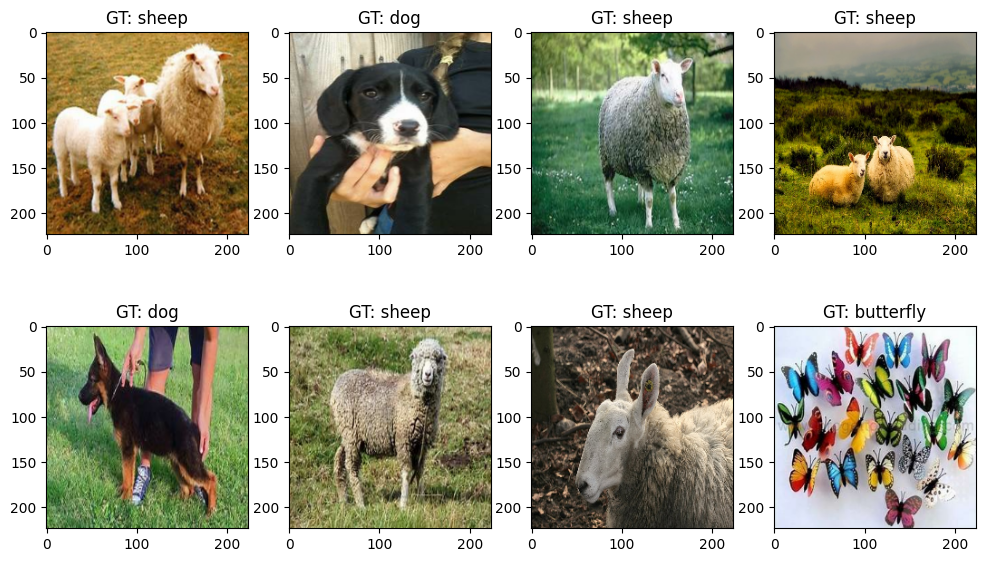

In [21]:
# plot all images in the batch
plt.figure(figsize=(12,7))
plt.tight_layout()
for idx in range(8):
    img = (val_x[idx]*255).numpy().astype(int)
    gt_idx = val_y[idx].numpy().argmax()
    plt.subplot(2, 4, idx+1)
    plt.imshow(img)
    plt.title(f'GT: {classes[gt_idx]}')
plt.show()

In [25]:
(train_x, train_y) = iter(train_ds.take(5)).next()
(train_x, train_y)

(<tf.Tensor: shape=(8, 224, 224, 3), dtype=float32, numpy=
 array([[[[0.93333334, 0.90588236, 0.9372549 ],
          [0.91764706, 0.8862745 , 0.92156863],
          [0.9019608 , 0.8745098 , 0.9137255 ],
          ...,
          [0.88235295, 0.8117647 , 0.7882353 ],
          [0.88235295, 0.80784315, 0.78431374],
          [0.88235295, 0.80784315, 0.78039217]],
 
         [[0.88235295, 0.8509804 , 0.8745098 ],
          [0.87058824, 0.8392157 , 0.8627451 ],
          [0.85882354, 0.827451  , 0.85490197],
          ...,
          [0.84705883, 0.78039217, 0.74509805],
          [0.84705883, 0.7764706 , 0.7490196 ],
          [0.84705883, 0.7764706 , 0.74509805]],
 
         [[0.8117647 , 0.77254903, 0.7764706 ],
          [0.8       , 0.7647059 , 0.76862746],
          [0.8       , 0.7647059 , 0.76862746],
          ...,
          [0.80784315, 0.74509805, 0.6901961 ],
          [0.80784315, 0.74509805, 0.69411767],
          [0.80784315, 0.74509805, 0.69803923]],
 
         ...,
 
       

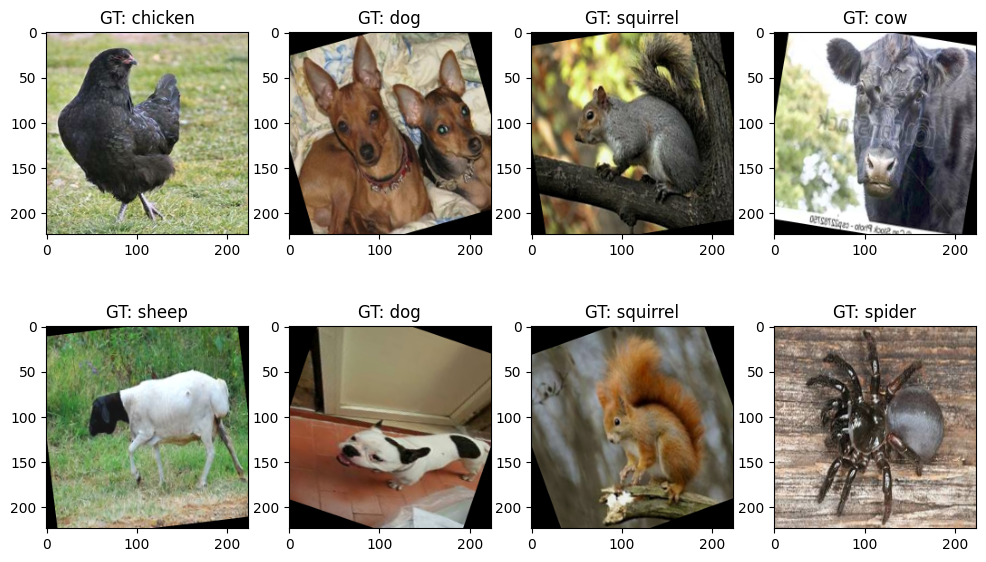

In [26]:
# plot all images in the batch
plt.figure(figsize=(12,7))
plt.tight_layout()
for idx in range(8):
    img = (train_x[idx]*255).numpy().astype(int)
    gt_idx = train_y[idx].numpy().argmax()
    plt.subplot(2, 4, idx+1)
    plt.imshow(img)
    plt.title(f'GT: {classes[gt_idx]}')
plt.show()